# Machine Learning Model

### More Work Left

Now that all three machine learning models are ready (Support Vector Machine, Logistic Regression, Random Forest), <br>
we are targeting the following work to be completed next: 
- Improving the positve class classification accuracy
- Ensembling several machine learning techniques in order to:
    1. decrease variance (bagging),
    2. bias (boosting),
    3. improve predictions (stacking)
    
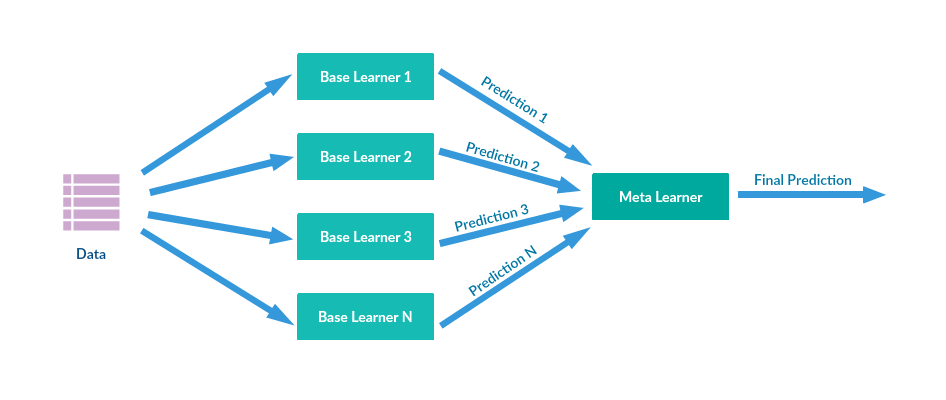

### Future Scope

Machine learning is very limitative to feature extraction and feature engineering, in future we can use deep learning to overcome these limitations and enhance the acurate prediction made by machine learning model. In addition to it we can use various stack of deep learning frameworks like artificial neural network (ANN), Long short-term memory (LSTM), recurrent neural network (RNN).

<br>
<hr>

In [1]:
import os
import warnings
import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("../Data/train.csv")
test = pd.read_csv("../Data/test.csv")

In [3]:
X_train = train.drop(columns=['TenYearCHD'], axis=1)
y_train = train.TenYearCHD

X_test = test.drop(columns=['TenYearCHD'], axis=1)
y_test = test.TenYearCHD

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

sv_model = LinearSVC(random_state=0)
lr_model = LogisticRegression(random_state=0)
rf_model = RandomForestClassifier(random_state=0)

In [5]:
lr_model.fit(X=X_train, y=y_train)
rf_model.fit(X=X_train, y=y_train)
sv_model.fit(X=X_train, y=y_train)

lr_pred = lr_model.predict(X=X_test)
rf_pred = rf_model.predict(X=X_test)
sv_pred = sv_model.predict(X=X_test)

### Classification Report of Predictive Models

In [6]:
print(classification_report(y_true=y_test, y_pred=lr_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       618
           1       0.50      0.04      0.07       114

   micro avg       0.84      0.84      0.84       732
   macro avg       0.67      0.51      0.49       732
weighted avg       0.79      0.84      0.78       732



In [7]:
print(classification_report(y_true=y_test, y_pred=rf_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       618
           1       0.47      0.08      0.14       114

   micro avg       0.84      0.84      0.84       732
   macro avg       0.66      0.53      0.52       732
weighted avg       0.79      0.84      0.79       732



In [8]:
print(classification_report(y_true=y_test, y_pred=sv_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       618
           1       0.17      0.01      0.02       114

   micro avg       0.84      0.84      0.84       732
   macro avg       0.51      0.50      0.46       732
weighted avg       0.74      0.84      0.77       732



# Confusion Matrix

In [9]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[0.99352751 0.00647249]
 [0.96491228 0.03508772]]


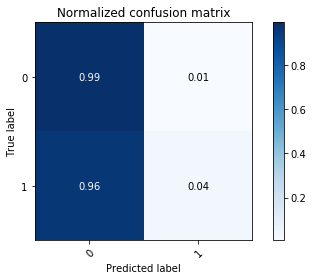

In [10]:
plot_confusion_matrix(y_test, lr_pred, classes=np.unique(y_test), normalize=True)

Normalized confusion matrix
[[0.98381877 0.01618123]
 [0.92105263 0.07894737]]


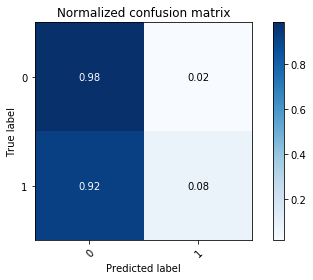

In [11]:
plot_confusion_matrix(y_test, rf_pred, classes=np.unique(y_test), normalize=True)

Normalized confusion matrix
[[0.99190939 0.00809061]
 [0.99122807 0.00877193]]


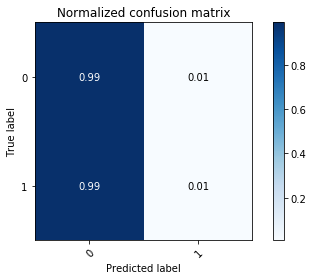

In [12]:
plot_confusion_matrix(y_test, sv_pred, classes=np.unique(y_test), normalize=True)

<hr>